In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis,plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Q [[1.e+00 0.e+00 0.e+00]
 [0.e+00 2.e+03 0.e+00]
 [0.e+00 0.e+00 2.e+01]]





 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 

 State beta violation: -0.31 < -0.17, 
 State alpha violation: 0.32 > 0.17, 

 State beta violation: -0.44 < -0.17, 
 State alpha violation: 0.47 > 0.17, 

 State beta violation: -0.56 < -0.17, 
 State alpha violation: 0.66 > 0.17, 

 State beta violation: -0.66 < -0.17, 
 State alpha violation: 0.85 > 0.17, 

 State beta violation: -0.73 < -0.17, 
 State alpha violation: 1.02 > 0.17, 

 State beta violation: -0.76 < -0.17, 
 State alpha violation: 1.17 > 0.17, 

 State beta violation: -0.79 < -0.17, 
 State alpha violation: 1.27 > 0.17, 

 State beta violation: -0.80 < -0.17, 
 State alpha violation: 1.33 > 0.17, 

 State beta violation: -0.80 < -0.17, 
 State alpha violation: 1.35 > 0.17, 

 State beta violation: -0.81 < -0.17, 
 State alpha violation: 1.32 > 0.17, 

 State beta violation: -0.82 < -0.17, 
 State alpha violation:

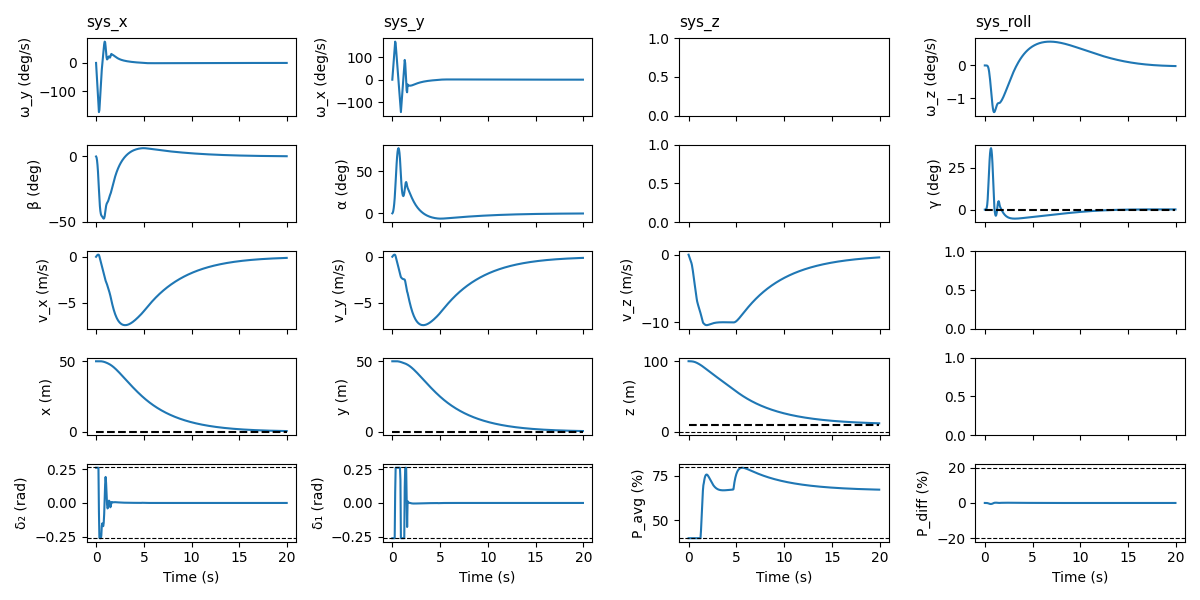

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

In [ ]:
Ts = 0.05
sim_time = 20
H = 10.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10])   # target state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear"
)

plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, x_target)

vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# vis.animate(
#     t_cl[:-1],
#     x_cl[:, :-1],
#     u_cl,
#     Ref=ref[:, :-1],
#     T_ol=t_ol[..., :-1],
#     X_ol=x_ol,
#     U_ol=u_ol,
# );

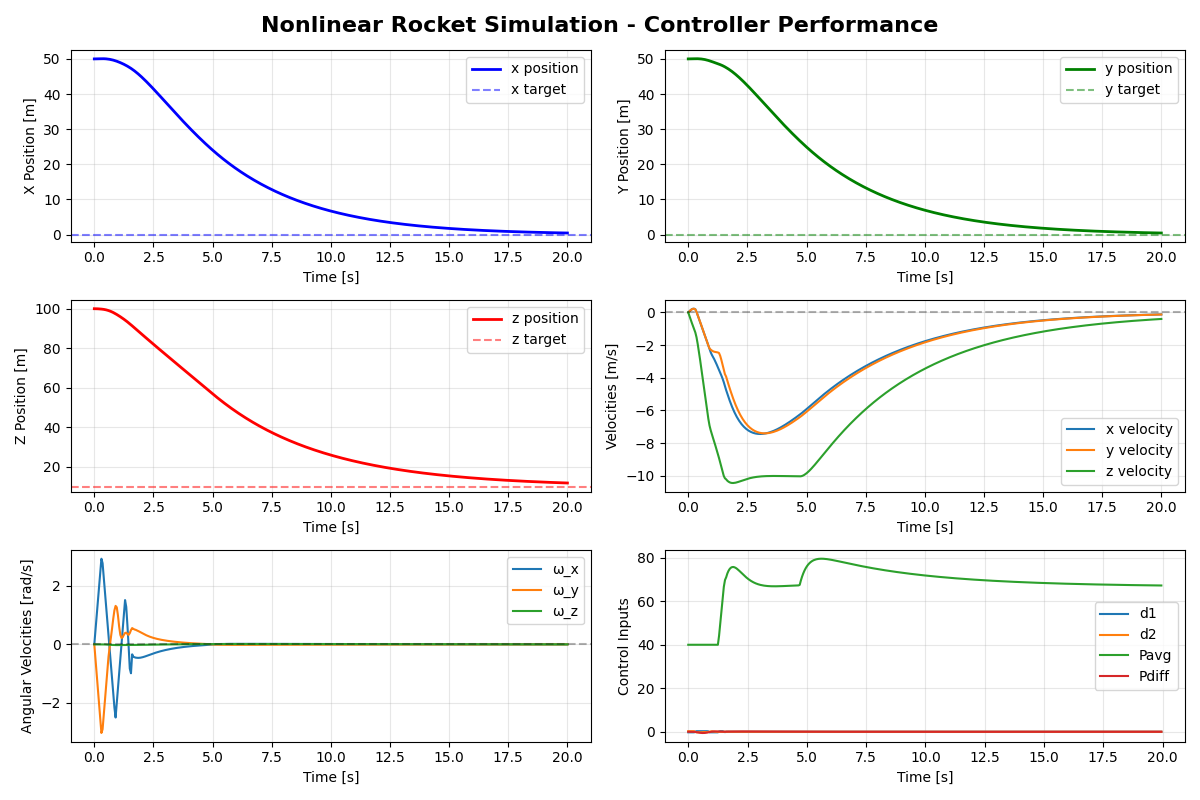

Final position: [0.427, 0.443, 11.854] m
Target position: [0.000, 0.000, 10.000] m
Position error: 1.9534 m


In [5]:
import matplotlib.pyplot as plt

# Create comprehensive trajectory plots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Nonlinear Rocket Simulation - Controller Performance', fontsize=16, fontweight='bold')

# Position plots
axes[0, 0].plot(t_cl, x_cl[9, :], 'b-', linewidth=2, label='x position')
axes[0, 0].axhline(y=pos_target[0], color='b', linestyle='--', alpha=0.5, label='x target')
axes[0, 0].set_ylabel('X Position [m]')
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(t_cl, x_cl[10, :], 'g-', linewidth=2, label='y position')
axes[0, 1].axhline(y=pos_target[1], color='g', linestyle='--', alpha=0.5, label='y target')
axes[0, 1].set_ylabel('Y Position [m]')
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(t_cl, x_cl[11, :], 'r-', linewidth=2, label='z position')
axes[1, 0].axhline(y=pos_target[2], color='r', linestyle='--', alpha=0.5, label='z target')
axes[1, 0].set_ylabel('Z Position [m]')
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Velocity plots
axes[1, 1].plot(t_cl, x_cl[6, :], label='x velocity')
axes[1, 1].plot(t_cl, x_cl[7, :], label='y velocity')
axes[1, 1].plot(t_cl, x_cl[8, :], label='z velocity')
axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].set_ylabel('Velocities [m/s]')
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Angular velocity plots
axes[2, 0].plot(t_cl, x_cl[0, :], label='ω_x')
axes[2, 0].plot(t_cl, x_cl[1, :], label='ω_y')
axes[2, 0].plot(t_cl, x_cl[2, :], label='ω_z')
axes[2, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2, 0].set_ylabel('Angular Velocities [rad/s]')
axes[2, 0].set_xlabel('Time [s]')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Control inputs
axes[2, 1].plot(t_cl[:-1], u_cl[0, :], label='d1')
axes[2, 1].plot(t_cl[:-1], u_cl[1, :], label='d2')
axes[2, 1].plot(t_cl[:-1], u_cl[2, :], label='Pavg')
axes[2, 1].plot(t_cl[:-1], u_cl[3, :], label='Pdiff')
axes[2, 1].set_ylabel('Control Inputs')
axes[2, 1].set_xlabel('Time [s]')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final position: [{x_cl[9, -1]:.3f}, {x_cl[10, -1]:.3f}, {x_cl[11, -1]:.3f}] m")
print(f"Target position: [{pos_target[0]:.3f}, {pos_target[1]:.3f}, {pos_target[2]:.3f}] m")
print(f"Position error: {np.linalg.norm(x_cl[9:12, -1] - pos_target):.4f} m")